In [73]:
import pandas as pd
import os
from datetime import datetime

### Task #1: Merge 12 months of sales data into a single file

In [74]:
files = [file for file in os.listdir('./sales_data')]

all_months_df = pd.DataFrame()

for file in files:
    df = pd.read_csv(f'./sales_data/{file}')
    all_months_df = pd.concat([all_months_df, df])
    
all_months_df.to_csv("all_data.csv", index=False)


### Read merged dataframe

In [75]:
all_data_df = pd.read_csv("all_data.csv")

### Augment data with additional columns

### Clean up data

### Drop NaN rows

In [78]:
all_data_df = all_data_df.dropna(how='all')

### Find 'Or' and delete it

In [79]:
all_data_df = all_data_df[all_data_df['Order Date'].str[0:2] != 'Or']

### Convert columns to the correct type

In [80]:
all_data_df['Quantity Ordered'] = pd.to_numeric(all_data_df['Quantity Ordered'])
all_data_df['Price Each'] = pd.to_numeric(all_data_df['Price Each'])

### Task #2: Add month column

In [81]:
all_data_df['Month'] = all_data_df['Order Date'].str[0:2]
all_data_df['Month'] = all_data_df['Month'].astype('int32')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task #3: Add a total column

In [82]:
all_data_df['Total'] = all_data_df['Quantity Ordered'] * all_data_df['Price Each']

### Task #4: Add a city column

In [93]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data_df['City'] = all_data_df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

### Question #1: What was the best month for sales? How much was earned that month?

In [94]:
results = all_data_df.groupby('Month').sum()

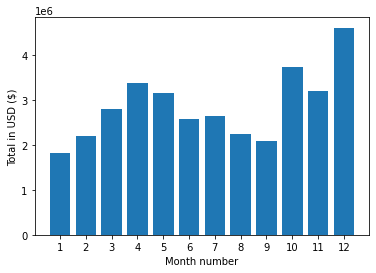

In [95]:
import matplotlib.pyplot as plt

months = range(1, 13)

plt.bar(months, results['Total'])
plt.xticks(months)
plt.ylabel('Total in USD ($)')
plt.xlabel('Month number')
plt.show()


### Question #2: What city had the highest number of sales?

In [96]:
results = all_data_df.groupby('City').sum()

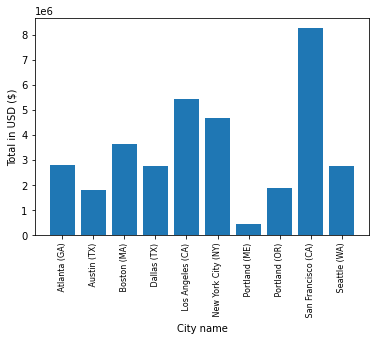

In [104]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data_df.groupby('City')]

plt.bar(cities, results['Total'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Total in USD ($)')
plt.xlabel('City name')
plt.show()


### Question #3: What time should we display advertisements to maximize likelihood of customer's buying product?